# Approach of Repayment Analysis/Prediction

<b>Problem Statement :</b><br>
Investors (lenders) provide loans to borrowers in exchange for the promise of repayment with interest. That means the lender only makes profit (interest) if the borrower pays off the loan. However, if he/she doesn’t repay the loan, then the lender loses money. We need analyze and measure risk for every borrowers in future to reduce money losses and the following prediciton model is to predict the loan status of future borrowers and borrowers could evaluate the risk of lending the money by using the prediction model to predict the risk of lending money.

<b>Approaches :</b><br>
Make it as binary calssifiaction problem , use 'loan_status' from loan data as variable to predict the loan repayment status. Choose related loan status cateogrize the loan status as two category (High Risk nad Low Risk):<br><br>
Below categoies are based on asusmption of wordings:
    
    Low Risk :
    - Settlement Paid Off
    - Paid Off Loan
    - Charged Off Paid Off
    
    
    High Risk :
    - Settled Bankruptcy
    - CSR Voided New Loan (Corporate social responsibility (CSR) is a self-regulating business model that helps a company be socially accountable)
    - Charged Off
 
 Utilize features from payment and clarity underwritting variables to help building the prediction model as welL.
 
 <b>Points to be aware of</b>: <br>
 -  Data sets are imbalance based on previous data exploratory analysis.
 -  Too many possible features might could help in building model but might also affect the accuracy if we just choose too many.

# 1. Selecting Features

In [1]:
# Import neccasary libraries

import numpy as np
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Read in required data

loan = pd.read_csv("data/loan.csv", sep="," ,parse_dates=['applicationDate','originatedDate'])
payment = pd.read_csv("data/payment.csv", sep = ",")
clarity = pd.read_csv("data/clarity_underwriting_variables.csv", sep = "," , low_memory=False)

In [3]:
## Inspecting columns
loan.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF'],
      dtype='object')

<b>In this case, we just need funded data from loan data as according to data dictionanary some approved loan void by customer(borrowers). Using just funded data will refelc true behaviour of the borrowers who get funded in the end<b> <br>
    
<b>The assumption 1 is funded and 0 is not funded and form the data sets  > 90% of the data is 0.<b>

In [3]:
## Extract just funded data

loan_funded = loan.loc[loan['isFunded'] == 1,:].copy()

In [4]:
loan_funded['loanStatus'].value_counts()

Paid Off Loan                  11427
External Collection            11334
New Loan                        8112
Internal Collection             5564
Returned Item                   1182
Settlement Paid Off              708
Settled Bankruptcy               325
Pending Paid Off                 169
Charged Off Paid Off             159
Charged Off                        1
Settlement Pending Paid Off        1
Name: loanStatus, dtype: int64

P/S : There are no 'CSR Voided New Loan' in funded loan

In [5]:
## Function to categorize loan stauts column
high_risk = ['Settled Bankruptcy', 'CSR Voided New Loan' , 'Charged Off']
low_risk = ['Settlement Paid Off', 'Paid Off Loan','Charged Off Paid Off' ]

## Lets use 1 as low_risk and 0 as high_risk for the ease of generatign target variables
def loan_risk(x) :
    if x in low_risk:
        return 1
    else:
        return 0

In [6]:
## Select and goruping the loan status as target variables

loan_funded = loan_funded.loc[loan_funded['loanStatus'].isin(low_risk+high_risk)]
loan_funded['loan_risk_prediction'] = loan_funded['loanStatus'].apply(loan_risk)

In [7]:
loan_funded.head(10)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,loan_risk_prediction
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,1
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31 17:48:17.381,True,2017-01-31 18:00:14.520,2.0,True,1,Paid Off Loan,1250.0,3313.78,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,1
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,True,2016-08-29 15:05:04.014,0.0,True,1,Paid Off Loan,800.0,2432.08,CA,bvMandatory,10,Checked,578f9346e4b0810ad5e7b72e,1,1
64,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,W,404.1,2016-05-25 03:05:18.849,True,2016-05-25 15:11:36.260,3.0,True,1,Paid Off Loan,300.0,422.64,WI,organic,0,Checked,56621584e4b0100e84141586,1,1
98,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,W,590.0,2015-05-26 17:02:27.312,True,2015-05-26 18:45:48.024,0.0,True,1,Paid Off Loan,300.0,896.87,MO,bvMandatory,6,Rejected,NaN,0,1
186,LL-I-04577739,edac6e371cda7512214ba74698247a19,B,601.0,2015-11-12 21:07:03.953,True,2015-11-12 21:57:28.345,0.0,True,1,Paid Off Loan,600.0,1616.20,SC,lead,10,Checked,557716a4e4b0a648a068ade3,1,1
195,LL-I-07240030,7a2dabf0d9fe553dd4136b17e3dca40b,B,590.0,2016-02-14 18:17:40.530,True,2016-02-17 18:41:15.519,0.0,True,1,Paid Off Loan,500.0,1368.75,OH,bvMandatory,3,Rejected,56c4a889e4b081940c382a71,1,1
281,LL-I-06082778,6f884e233bd17aadbda6c5bd2af2260c,B,625.0,2015-12-26 16:30:14.247,True,2015-12-27 15:48:34.522,1.0,True,1,Paid Off Loan,500.0,1600.91,IN,organic,0,Checked,5654b70de4b0819f35236355,1,1
373,LL-I-08124999,593b6d3e35436bfab3e8e6312599f5d8,S,360.0,2016-03-25 20:08:27.702,True,2016-03-25 20:57:33.780,3.0,True,1,Paid Off Loan,500.0,1129.20,IL,organic,0,Checked,558b295ee4b0ef21a8396d65,1,1
534,LL-I-05805964,6649208bb9d31f34bcf071cc531132c1,B,360.0,2015-12-16 18:43:31.248,True,2015-12-16 19:49:50.228,0.0,True,1,Paid Off Loan,300.0,635.28,IL,organic,0,Checked,54f1b43de4b03ac49a3bb9b3,1,1


In [8]:
## Inspect new loan_risk_prediction column

loan_funded['loan_risk_prediction'].value_counts()

1    12294
0      326
Name: loan_risk_prediction, dtype: int64

Things to take note : <br>
- We need to build a model in customer transaction level instead of loan transaction level hence we need make sure customer (in this case wil be anon_ssn column) does not appear in high risk and low risk category at the same time.
- There are some 'anon_ssn' values falls into 'high_risk' and 'low_risk' category, we need to remove these 'anon_ssn' to prevent it from disrupt the model accuracy and performance.

In [9]:
## Check how many 'anon_ssn' falls in both 'high_risk' and 'low_risk' category and remove those who appeared in both cateogories

annon_ssn_duplicated = loan_funded.groupby(['anon_ssn']).agg({'loan_risk_prediction':'nunique'}).reset_index()
annon_ssn_duplicated = annon_ssn_duplicated.loc[annon_ssn_duplicated['loan_risk_prediction']==2]

loan_funded_uniqe = loan_funded.loc[~loan_funded['anon_ssn'].isin(annon_ssn_duplicated['anon_ssn'])]

In [10]:
## Amount of new risk category after remove duplicated 'anon_ssn'

loan_funded_uniqe['loan_risk_prediction'].value_counts()

1    12240
0      281
Name: loan_risk_prediction, dtype: int64

<b> We will need to balance the amount of featuers before plug into machine learning model to prevent overfitting and bias, before that we look at other features<b>

In [11]:
## Check number of null values
loan_funded_uniqe.isnull().sum()

loanId                                 0
anon_ssn                               0
payFrequency                           0
apr                                    0
applicationDate                        0
originated                             0
originatedDate                         0
nPaidOff                               7
approved                               0
isFunded                               0
loanStatus                             0
loanAmount                             0
originallyScheduledPaymentAmount       0
state                                  0
leadType                               0
leadCost                               0
fpStatus                               0
clarityFraudId                      2568
hasCF                                  0
loan_risk_prediction                   0
dtype: int64

In [12]:
## Replace 0 wiht the 7 null valus in 'nPaidOff'
loan_funded_uniqe['nPaidOff'] = loan_funded_uniqe['nPaidOff'].fillna(0)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 2. Features Engineering

In [13]:
## Inspect column type
loan_funded_uniqe.dtypes

loanId                                      object
anon_ssn                                    object
payFrequency                                object
apr                                        float64
applicationDate                     datetime64[ns]
originated                                    bool
originatedDate                      datetime64[ns]
nPaidOff                                   float64
approved                                      bool
isFunded                                     int64
loanStatus                                  object
loanAmount                                 float64
originallyScheduledPaymentAmount           float64
state                                       object
leadType                                    object
leadCost                                     int64
fpStatus                                    object
clarityFraudId                              object
hasCF                                        int64
loan_risk_prediction           

# 2.1 Take some features from payment data

In [14]:
# Payment Data

payment.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


In [15]:
## From payment data let's aggregate installmentindex and paymentStatus column for each loan ID

# Aggregate number of distinct payment index
payment_index = payment.groupby(['loanId']).agg({'installmentIndex':'nunique'}).reset_index()

# Aggreate counf of echach payment status
payment['values'] = 1
payment_status = payment.pivot_table(index=['loanId'], columns=['paymentStatus'], values='values', aggfunc=sum, fill_value=0).reset_index()

final_payment = pd.merge(payment_index, payment_status, how='inner', on='loanId')

In [16]:
final_payment.head()

,loanId,installmentIndex,Cancelled,Checked,Complete,None,Pending,Rejected,Rejected Awaiting Retry,Returned,Skipped
0,LL-I-00000021,12,0,12,0,0,0,1,0,0,0
1,LL-I-00000231,20,8,2,0,8,0,2,0,0,0
2,LL-I-00000238,16,4,7,0,4,0,1,0,0,0
3,LL-I-00000308,22,10,1,0,10,0,1,0,0,0
4,LL-I-00000355,23,11,0,0,11,0,1,0,0,0


In [17]:
## Join with loan data

loan_funded_uniqe = loan_funded_uniqe.merge(final_payment, on='loanId', how='left')

# 2.2 Take clearfraudscore from clarity underwritting variables data

In [18]:
# Use clearfraudscore from clarity underwritting vairables data
clarity_clearfraudscore = clarity.loc[:,['underwritingid', 'clearfraudscore']].copy()

loan_funded_uniqe = loan_funded_uniqe.merge(clarity_clearfraudscore, left_on= 'clarityFraudId', right_on = 'underwritingid', how='left')

In [19]:
loan_funded_uniqe.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,Checked,Complete,None,Pending,Rejected,Rejected Awaiting Retry,Returned,Skipped,underwritingid,clearfraudscore
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,...,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,569eb3a3e4b096699f685d64,879.0
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31 17:48:17.381,True,2017-01-31 18:00:14.520,2.0,True,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58450a15e4b0bb9d6d7344c7,835.0
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,True,2016-08-29 15:05:04.014,0.0,True,1,...,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,578f9346e4b0810ad5e7b72e,624.0
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,W,404.1,2016-05-25 03:05:18.849,True,2016-05-25 15:11:36.260,3.0,True,1,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56621584e4b0100e84141586,770.0
4,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,W,590.0,2015-05-26 17:02:27.312,True,2015-05-26 18:45:48.024,0.0,True,1,...,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN


In [20]:
## Drop irrelevant columns for now

loan_funded_uniqe = loan_funded_uniqe.drop( ['isFunded','loanStatus','state','clarityFraudId','underwritingid'], axis = 1)

In [21]:
## Check Null Values After JOin

loan_funded_uniqe.isnull().sum()

loanId                                 0
anon_ssn                               0
payFrequency                           0
apr                                    0
applicationDate                        0
originated                             0
originatedDate                         0
nPaidOff                               0
approved                               0
loanAmount                             0
originallyScheduledPaymentAmount       0
leadType                               0
leadCost                               0
fpStatus                               0
hasCF                                  0
loan_risk_prediction                   0
installmentIndex                       2
Cancelled                              2
Checked                                2
Complete                               2
None                                   2
Pending                                2
Rejected                               2
Rejected Awaiting Retry                2
Returned        

In [22]:
## Remove rows with null clearfraudscore score and replace others null valuee with zero
loan_funded_uniqe = loan_funded_uniqe.loc[~loan_funded_uniqe['clearfraudscore'].isnull()]
loan_funded_uniqe = loan_funded_uniqe.fillna(0)

# 2.4 Categorical Variables


In [23]:
## Extract Categorical Variables and check the data variance ( eliminnate features that haas high variance)
categorical_variables = ['payFrequency', 'approved','originated','leadType','hasCF']

for i in categorical_variables:
    print(i + ':')
    print(loan_funded_uniqe[i].value_counts())
    print('\n')

payFrequency:
B    5868
W    2636
M     578
S     538
I     292
Name: payFrequency, dtype: int64


approved:
True    9912
Name: approved, dtype: int64


originated:
True    9912
Name: originated, dtype: int64


leadType:
bvMandatory      4219
lead             2698
organic          2392
prescreen         524
rc_returning       48
california         26
lionpay             2
instant-offer       1
express             1
repeat              1
Name: leadType, dtype: int64


hasCF:
1    9912
Name: hasCF, dtype: int64




# 2.4.1 Chi-Square Test for Categorical Variables

The chi-square statistical test is used to determine whether there’s a significant difference between an expected distribution and an actual distribution. It’s typically used with categorical data.

- <b>'approved'</b> and <b>'originated'</b> and <b>'hasCF'</b> will be removed and no need to put in chi sqiare test as just reamin one cateogry for both columns
- <b>'payFrequency'</b>,  <b>'leadType'</b>  will be chosen for chi saure test with target variables

In [24]:
from scipy.stats import chi2_contingency

    
payfrequency =    pd.crosstab(loan_funded_uniqe['payFrequency'],loan_funded_uniqe['loan_risk_prediction']) 
leadType = pd.crosstab(loan_funded_uniqe['leadType'],loan_funded_uniqe['loan_risk_prediction'])
hasCF = pd.crosstab(loan_funded_uniqe['hasCF'],loan_funded_uniqe['loan_risk_prediction']) 
    
chi2, p , dof, expected= chi2_contingency(payfrequency)
print('Pay Frequqnecy :')
print('Chi-square Statistic : ' ,chi2 )
print('P-Value : ' ,p )

print('\n')

chi2, p, dof, expected = chi2_contingency(leadType)
print('Lead Type :')
print('Chi-square Statistic : ' ,chi2 )
print('P-Value : ' ,p )

print('\n')

Pay Frequqnecy :
Chi-square Statistic :  5.059719357197741
P-Value :  0.2812246228084451


Lead Type :
Chi-square Statistic :  33.57351802749735
P-Value :  0.00010607318575840352




From the Chi-Square Test and observation of data variance, only <b>'leadType' (p-value <0.05) </b>is signifincantly affect target variables

In [25]:
# Drop 'approved' ,originated' and 'payFrequency' column
#loan_funded_uniqe = loan_funded_uniqe.drop( ['approved','originated','payFrequency','hasCF'], axis = 1)

# 2.5 Numerical Variables

In [26]:
##Generate more numerical variables from exisitng variables

# Time (hours) used to fund the loan
loan_funded_uniqe['time_used_fund'] = (loan_funded_uniqe['originatedDate'] - loan_funded_uniqe['applicationDate']).astype('timedelta64[h]').astype(int)

# Utilize loan id to find out how many loan per customer
loan_funded_uniqe['loan_count_per_customer'] = loan_funded_uniqe['anon_ssn'].map(loan_funded_uniqe.groupby('anon_ssn')['loanId'].count()).astype(int)

Text(0, 0.5, 'density')

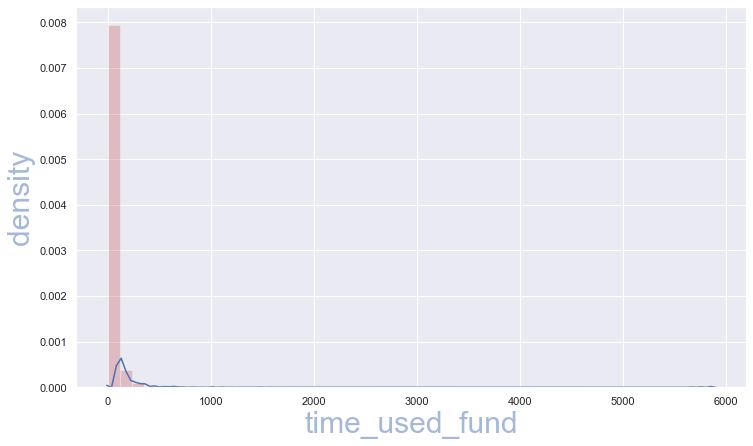

In [27]:
######################## Density Plot time used for funding #####################
sns.set(color_codes=True)
plot = sns.distplot(loan_funded_uniqe['time_used_fund'],
hist_kws={"color":"r","alpha":0.3,"label":"Frequency"});
plot.figure.set_size_inches(12,7)
plot.set_xlabel('time_used_fund',size = 30,color="b",alpha=0.5)
plot.set_ylabel("density",size = 30,color="b",alpha=0.5)

In [28]:
loan_funded_uniqe['loanAmount'].describe()

count    9912.000000
mean      655.917676
std       478.079726
min       100.000000
25%       400.000000
50%       500.000000
75%       750.000000
max      4687.000000
Name: loanAmount, dtype: float64

According to the plot and statistics above , 75% of the loan funding used below 23 hours 

Text(0, 0.5, 'density')

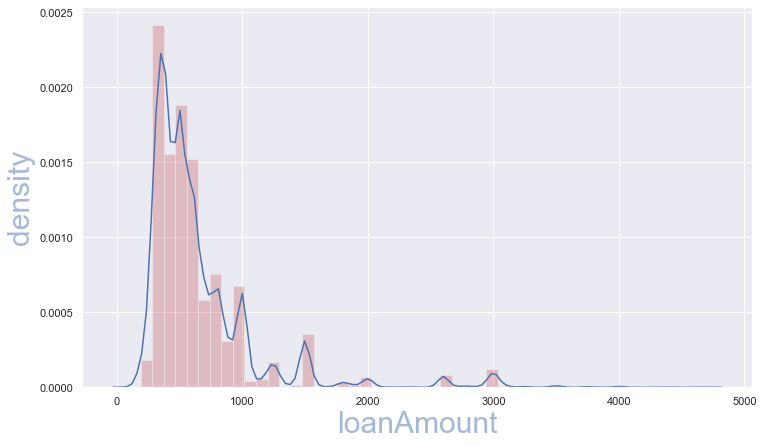

In [29]:
######################## Density Plot for loan amount #####################
sns.set(color_codes=True)
plot = sns.distplot(loan_funded_uniqe['loanAmount'],
hist_kws={"color":"r","alpha":0.3,"label":"Frequency"});
plot.figure.set_size_inches(12,7)
plot.set_xlabel('loanAmount',size = 30,color="b",alpha=0.5)
plot.set_ylabel("density",size = 30,color="b",alpha=0.5)

In [30]:
loan_funded_uniqe['loanAmount'].describe()

count    9912.000000
mean      655.917676
std       478.079726
min       100.000000
25%       400.000000
50%       500.000000
75%       750.000000
max      4687.000000
Name: loanAmount, dtype: float64

According to the plot and statistics above , 75% of the loan amount used below 700 USD

Text(0, 0.5, 'density')

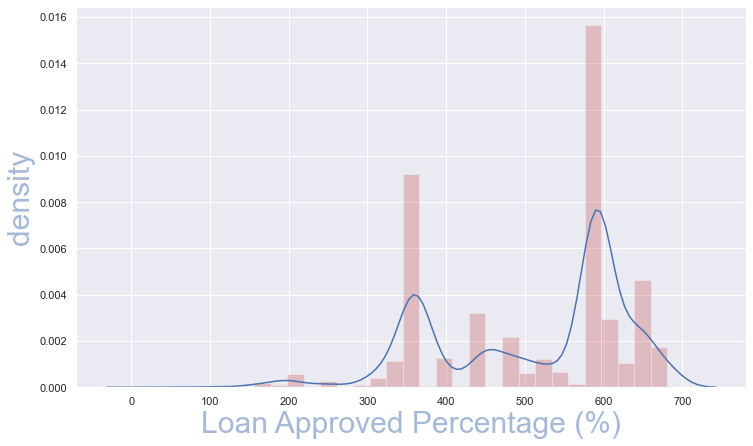

In [31]:
######################## Density Plot for loann Approve Percentage #####################
sns.set(color_codes=True)
plot = sns.distplot(loan_funded_uniqe['apr'],
hist_kws={"color":"r","alpha":0.3,"label":"Frequency"});
plot.figure.set_size_inches(12,7)
plot.set_xlabel('Loan Approved Percentage (%)',size = 30,color="b",alpha=0.5)
plot.set_ylabel("density",size = 30,color="b",alpha=0.5)

In [32]:
loan_funded_uniqe['apr'].describe()

count    9912.000000
mean      512.230474
std       121.483558
min        29.990000
25%       360.000000
50%       590.000000
75%       590.000000
max       681.000000
Name: apr, dtype: float64

According to the plot and statistics above , there are two majority group which their loan approved percentage (%) are some where near (300% - 350%) and ~600%. <br><br>
Let's have a quick look on the distribution on the risk status for these two groups

In [33]:
## Extract these two parts to see the distribtion of risk status

three_hundred_apr = loan_funded_uniqe.loc[(loan_funded_uniqe['apr']>=300) & (loan_funded_uniqe['apr']<=350)]
six_hundred_apr = loan_funded_uniqe.loc[(loan_funded_uniqe['apr']>=550) & (loan_funded_uniqe['apr']<=600)]

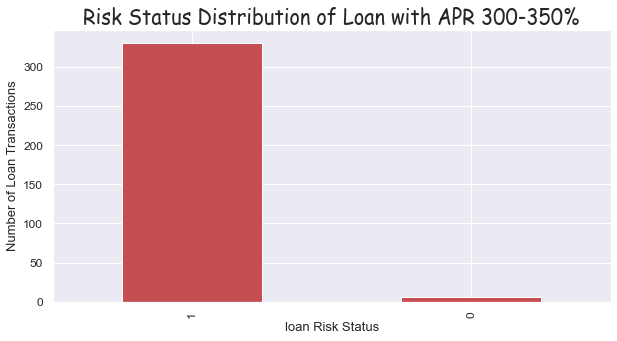

In [34]:
# 300-350% APR 

%matplotlib inline

ax = three_hundred_apr['loan_risk_prediction'].value_counts().plot(kind='bar', figsize=(10, 5), legend=False, fontsize=12,color='r')
ax.set_xlabel("loan Risk Status", fontsize=13)
ax.set_ylabel("Number of Loan Transactions", fontsize=13)
ax.set_title("Risk Status Distribution of Loan with APR 300-350%", fontname='Comic Sans MS', fontsize=20)
plt.show()

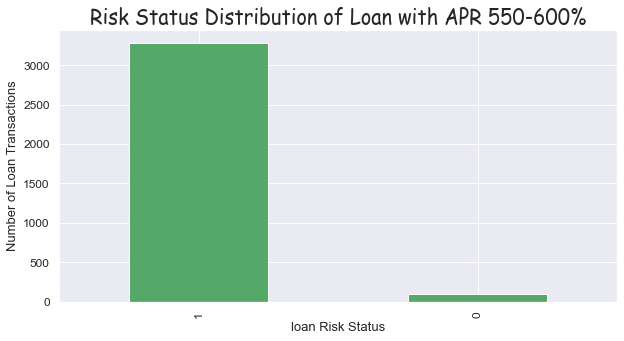

In [35]:
# 550-600% APR 

%matplotlib inline

ax = six_hundred_apr['loan_risk_prediction'].value_counts().plot(kind='bar', figsize=(10, 5), legend=False, fontsize=12,color='g')
ax.set_xlabel("loan Risk Status", fontsize=13)
ax.set_ylabel("Number of Loan Transactions", fontsize=13)
ax.set_title("Risk Status Distribution of Loan with APR 550-600%", fontname='Comic Sans MS', fontsize=20)
plt.show()

From above two bar charts, it indicates the two large group with have apr of (300%-350%) and (550%-600%) mostly thier risk status are under 'low risk' loan status.

Text(0, 0.5, 'density')

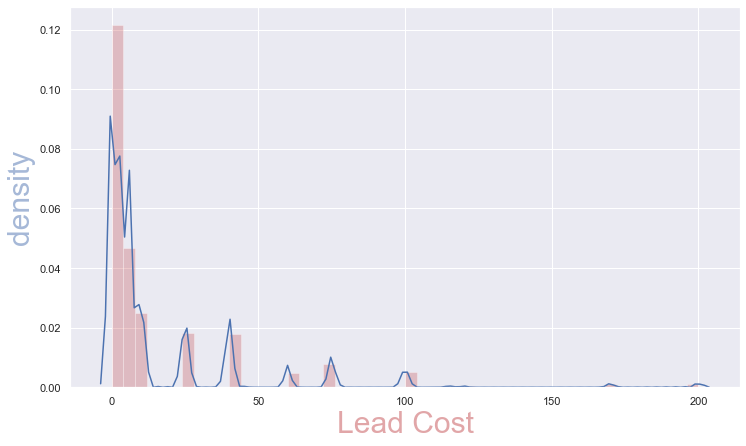

In [36]:
######################## Density Plot for lead cost#####################
sns.set(color_codes=True)
plot = sns.distplot(loan_funded_uniqe['leadCost'],
hist_kws={"color":"r","alpha":0.3,"label":"Frequency"});
plot.figure.set_size_inches(12,7)
plot.set_xlabel('Lead Cost',size = 30,color="r",alpha=0.5)
plot.set_ylabel("density",size = 30,color="b",alpha=0.5)

In [37]:
loan_funded_uniqe['leadCost'].describe()

count    9912.000000
mean       14.828390
std        27.171074
min         0.000000
25%         0.000000
50%         6.000000
75%        10.000000
max       200.000000
Name: leadCost, dtype: float64

Text(0, 0.5, 'density')

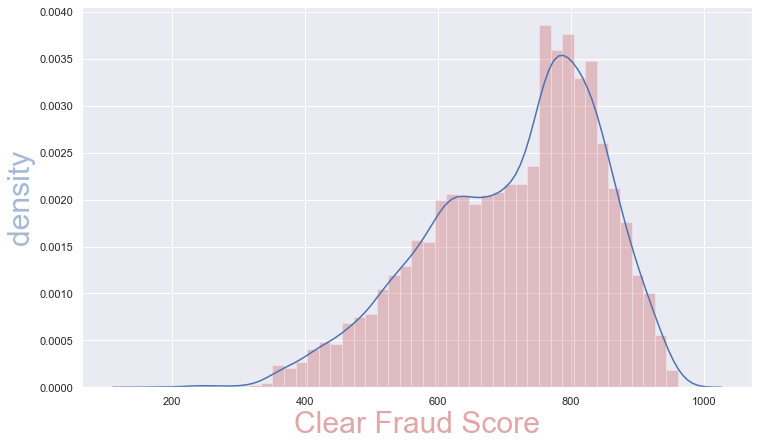

In [38]:
######################## Density Plot for clearfraudscore#####################
sns.set(color_codes=True)
plot = sns.distplot(loan_funded_uniqe['clearfraudscore'],
hist_kws={"color":"r","alpha":0.3,"label":"Frequency"});
plot.figure.set_size_inches(12,7)
plot.set_xlabel('Clear Fraud Score',size = 30,color="r",alpha=0.5)
plot.set_ylabel("density",size = 30,color="b",alpha=0.5)

In [39]:
loan_funded_uniqe['clearfraudscore'].describe()

count    9912.000000
mean      714.299031
std       129.983177
min       177.000000
25%       623.000000
50%       743.000000
75%       814.000000
max       961.000000
Name: clearfraudscore, dtype: float64

Text(0, 0.5, 'density')

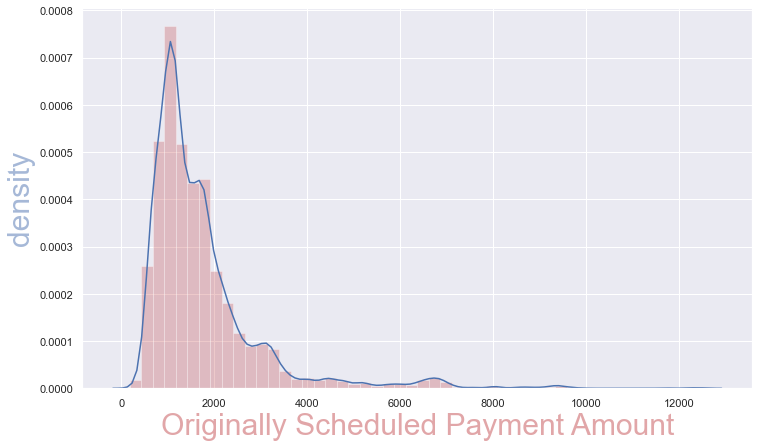

In [40]:
######################## Density Plot for originallyScheduledPaymentAmount#####################
sns.set(color_codes=True)
plot = sns.distplot(loan_funded_uniqe['originallyScheduledPaymentAmount'],
hist_kws={"color":"r","alpha":0.3,"label":"Frequency"});
plot.figure.set_size_inches(12,7)
plot.set_xlabel('Originally Scheduled Payment Amount',size = 30,color="r",alpha=0.5)
plot.set_ylabel("density",size = 30,color="b",alpha=0.5)

In [41]:
loan_funded_uniqe['originallyScheduledPaymentAmount'].describe()

count     9912.000000
mean      1736.928615
std       1264.606990
min        188.410000
25%       1014.047500
50%       1382.870000
75%       1989.187500
max      12550.080000
Name: originallyScheduledPaymentAmount, dtype: float64

C:\Users\USER\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'density')

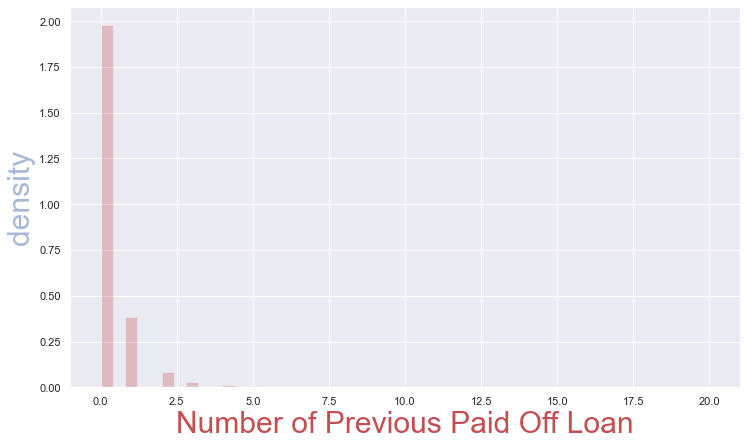

In [42]:
######################## Density Plot for originallyScheduledPaymentAmount#####################
sns.set(color_codes=True)
plot = sns.distplot(loan_funded_uniqe['nPaidOff'],
hist_kws={"color":"r","alpha":0.3,"label":"Frequency"});
plot.figure.set_size_inches(12,7)
plot.set_xlabel('Number of Previous Paid Off Loan',size = 30,color="r")
plot.set_ylabel("density",size = 30,color="b",alpha=0.5)

In [43]:
loan_funded_uniqe['nPaidOff'].describe()

count    9912.000000
mean        0.311945
std         0.855370
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: nPaidOff, dtype: float64

Text(0, 0.5, 'density')

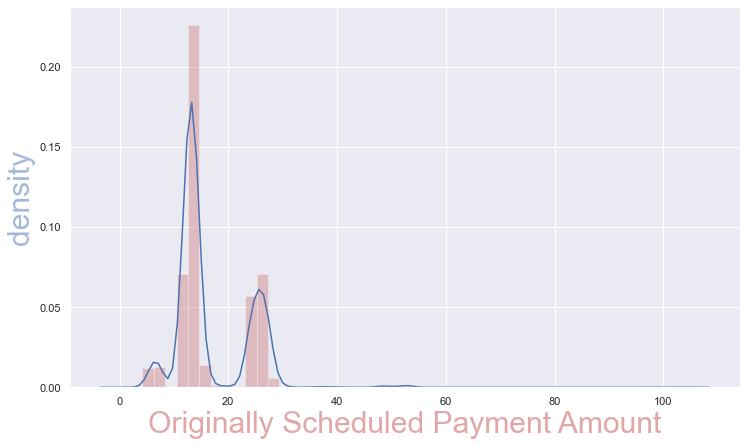

In [44]:
######################## Density Plot for installmentIndex#####################
sns.set(color_codes=True)
plot = sns.distplot(loan_funded_uniqe['installmentIndex'],
hist_kws={"color":"r","alpha":0.3,"label":"Frequency"});
plot.figure.set_size_inches(12,7)
plot.set_xlabel('Originally Scheduled Payment Amount',size = 30,color="r",alpha=0.5)
plot.set_ylabel("density",size = 30,color="b",alpha=0.5)

In [45]:
loan_funded_uniqe['installmentIndex'].describe()

count    9912.000000
mean       16.680488
std         6.893361
min         0.000000
25%        13.000000
50%        14.000000
75%        24.000000
max       105.000000
Name: installmentIndex, dtype: float64

Based on all the above density plot and statistic, clearfraudscore, others columns are not normally distributed , hence we should normalize those non-normlaized columns by log transformation

In [46]:
#columns that need to normalized

columns = ['apr','nPaidOff', 'loanAmount','originallyScheduledPaymentAmount','leadCost',
                       'clearfraudscore', 'installmentIndex','time_used_fund']


for i in columns:
    loan_funded_uniqe[i+'_log'] = np.log10(loan_funded_uniqe[i].values)
    
##replace all negative infinity with zero in data sets
loan_funded_uniqe = loan_funded_uniqe.replace(-np.Inf, 0)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


# 2.5.1 Correlation analysis between numerical variables to prevent multicollinearity

In [47]:
## Numerical Columns

numerical_variables = ['apr_log','nPaidOff_log', 'loanAmount_log','originallyScheduledPaymentAmount_log','leadCost_log',
                       'clearfraudscore', 'installmentIndex_log', 'Cancelled', 'Checked', 'Complete',
                       'None', 'Pending', 'Rejected', 'Rejected Awaiting Retry', 'Returned',
                       'Skipped','time_used_fund_log','loan_count_per_customer']

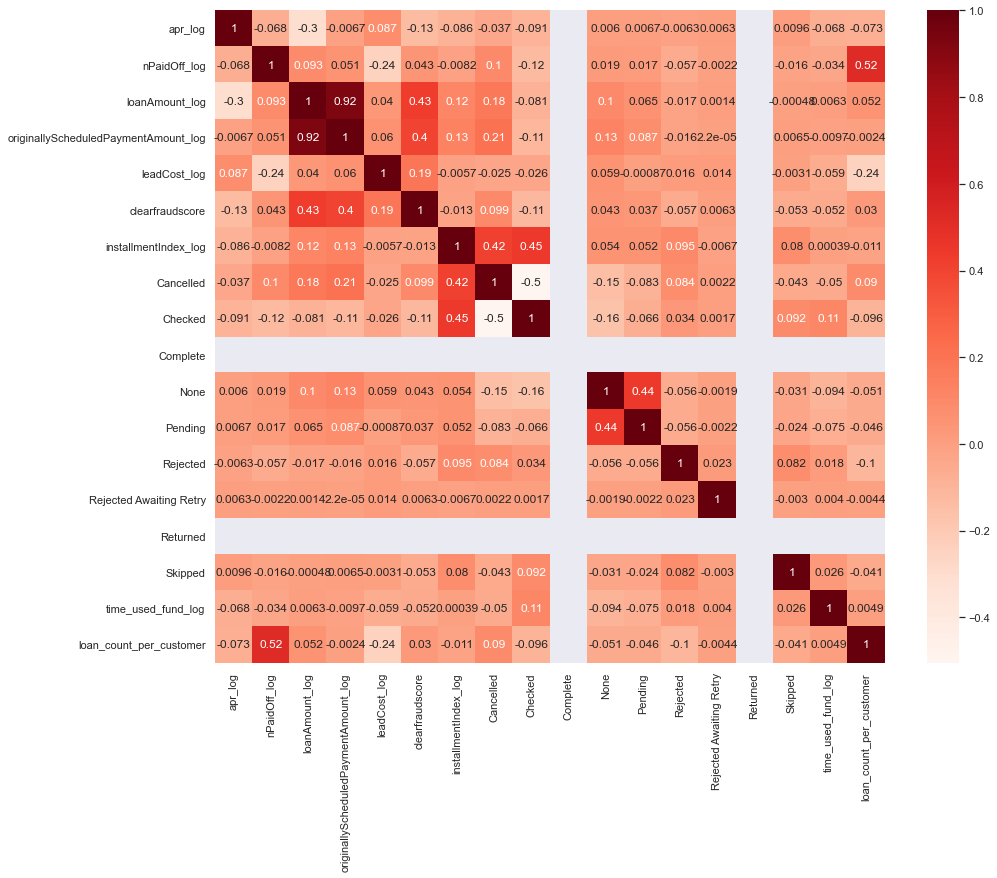

In [48]:
#Correlation aand heatmap
plt.figure(figsize=(15,12))
numerical_corr = loan_funded_uniqe[numerical_variables].corr()
sns.heatmap(numerical_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [49]:
## Select numerical columns that have least correlation woth each other to prevent multicollinearity

columns = np.full((numerical_corr.shape[0],), True, dtype=bool)
for i in range(numerical_corr.shape[0]):
    for j in range(i+1, numerical_corr.shape[0]):
        if numerical_corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = loan_funded_uniqe[numerical_variables].columns[columns]

## Remaining numerical columns 
selected_columns

Index(['apr_log', 'nPaidOff_log', 'loanAmount_log', 'leadCost_log',
       'clearfraudscore', 'installmentIndex_log', 'Cancelled', 'Checked',
       'Complete', 'None', 'Pending', 'Rejected', 'Rejected Awaiting Retry',
       'Returned', 'Skipped', 'time_used_fund_log', 'loan_count_per_customer'],
      dtype='object')

# 2.5.2 Principle Component Analysis (PCA) to reduce dimension of numerical data

Since correlation analysis unable to significantly reduce much of the numerical columns hence we use PCA to reduce dimension of remaining numercial columns.<br>



In [50]:
#Import PCA library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the selected numerical onto unit scale (mean = 0 and variance = 1) 
x = loan_funded_uniqe.loc[:, selected_columns].values
x = StandardScaler().fit_transform(x)

# Reduce to 8 features
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)


principalDf = pd.DataFrame(data = principalComponents)


#Inspect the princple component data frane
principalDf.head(10)

,0,1,2,3,4,5,6,7
0,1.561538,0.621045,3.486372,2.262860,-2.203983,0.011525,-0.319939,0.938843
1,4.573982,-2.075853,-1.164598,0.546435,-0.378602,-0.243209,0.666309,-1.287197
2,-0.989935,0.009655,-0.133213,0.157232,-0.914356,0.028978,-0.174774,0.594771
3,3.790781,-3.316902,-0.045391,0.786170,1.402363,-0.538052,0.605824,-0.122382
4,-0.508063,0.749443,-0.596515,-0.234181,-0.885230,-0.707021,0.680202,-0.845817
5,-0.503953,-0.601514,-0.379489,-1.090618,0.408565,0.975451,-0.898378,1.178858
6,0.976026,-1.435825,-0.927976,0.242820,-0.595592,-0.143117,0.134541,0.125051
7,3.673087,-3.051707,-1.614337,0.934598,0.355373,-0.064070,0.459492,-0.868060
8,-0.255920,-0.099436,-0.455675,0.445096,-1.059313,-0.387490,0.257552,-0.197707
9,-1.007770,-0.643643,-2.623319,-0.526126,-0.580739,0.148305,-0.149653,-0.146930


In [51]:
# Variance ratio of each new principal component and total variance ration of orignal data

print (pca.explained_variance_ratio_)

sum(pca.explained_variance_ratio_)

[0.13053215 0.11268334 0.10748707 0.09661634 0.08626968 0.06779023
 0.06648736 0.06565348]


0.7335196540133488

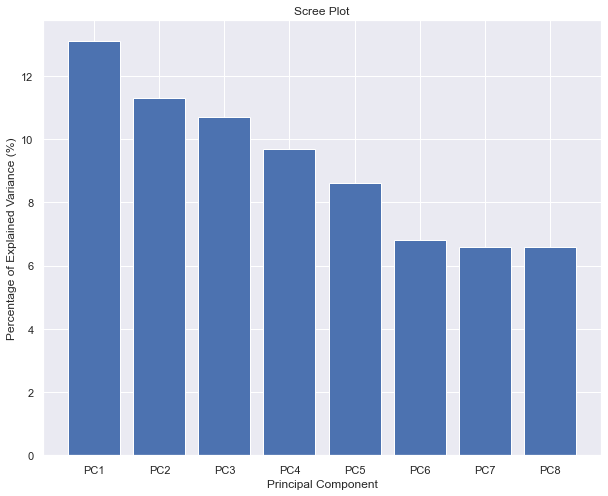

In [52]:
# Plot the variance percentage of each new principal component features
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]


plt.figure(figsize=(10,8))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance (%)')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Combine chosen catgorical varaibles and these principal components together

In [53]:
## Match these principal camponents with seelected categorical variable from loan data

principalDf['anon_ssn'] = list(loan_funded_uniqe['anon_ssn'])
principalDf['leadType'] = list(loan_funded_uniqe['leadType'])
principalDf['loan_risk_prediction'] = list(loan_funded_uniqe['loan_risk_prediction'])


In [54]:
principalDf.head(10)

,0,1,2,3,4,5,6,7,anon_ssn,leadType,loan_risk_prediction
0,1.561538,0.621045,3.486372,2.262860,-2.203983,0.011525,-0.319939,0.938843,464f5d9ae4fa09ece4048d949191865c,prescreen,1
1,4.573982,-2.075853,-1.164598,0.546435,-0.378602,-0.243209,0.666309,-1.287197,bc9fa73468acf18cb968a3a6a3c4697c,organic,1
2,-0.989935,0.009655,-0.133213,0.157232,-0.914356,0.028978,-0.174774,0.594771,10cefd11d41612b032fd9cd2debe32dc,bvMandatory,1
3,3.790781,-3.316902,-0.045391,0.786170,1.402363,-0.538052,0.605824,-0.122382,1d249e27292d25e4d3b4bc142a2a4aea,organic,1
4,-0.508063,0.749443,-0.596515,-0.234181,-0.885230,-0.707021,0.680202,-0.845817,edac6e371cda7512214ba74698247a19,lead,1
5,-0.503953,-0.601514,-0.379489,-1.090618,0.408565,0.975451,-0.898378,1.178858,7a2dabf0d9fe553dd4136b17e3dca40b,bvMandatory,1
6,0.976026,-1.435825,-0.927976,0.242820,-0.595592,-0.143117,0.134541,0.125051,6f884e233bd17aadbda6c5bd2af2260c,organic,1
7,3.673087,-3.051707,-1.614337,0.934598,0.355373,-0.064070,0.459492,-0.868060,593b6d3e35436bfab3e8e6312599f5d8,organic,1
8,-0.255920,-0.099436,-0.455675,0.445096,-1.059313,-0.387490,0.257552,-0.197707,6649208bb9d31f34bcf071cc531132c1,organic,1
9,-1.007770,-0.643643,-2.623319,-0.526126,-0.580739,0.148305,-0.149653,-0.146930,e562e435d0df75bc7bcd5845c219a063,organic,1


# 3. Prepare  the data and split into train and test data set

In [55]:
# Convert 'leadTYpe' to categorical variable

principalDf['leadType'] = principalDf['leadType'] .astype('category')
principalDf['leadType_cat']  =  principalDf['leadType'].cat.codes

In [56]:
principalDf.dtypes

0                        float64
1                        float64
2                        float64
3                        float64
4                        float64
5                        float64
6                        float64
7                        float64
anon_ssn                  object
leadType                category
loan_risk_prediction       int64
leadType_cat                int8
dtype: object

In [57]:
principalDf['loan_risk_prediction'].value_counts() 

1    9661
0     251
Name: loan_risk_prediction, dtype: int64

In [58]:
# Make the data sets with almost equal number of 0 and 1 to prevent overfitting and bias

model_df = pd.concat([principalDf.loc[principalDf['loan_risk_prediction'] == 1][0:300], principalDf.loc[principalDf['loan_risk_prediction'] == 0]])

In [59]:
model_df['loan_risk_prediction'].value_counts() 

1    300
0    251
Name: loan_risk_prediction, dtype: int64

In [60]:
# Split data to target and features
    
targets = model_df[['loan_risk_prediction']]
features =  model_df[[0,1,2,3,4,5,6,7,'leadType_cat']]

In [61]:
#importing the necessary packages  
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, targets ,test_size=0.2,random_state=100)

# 4. Implementing Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [62]:
# Logistic Regression with Cross Fold Grid Search 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train.values.ravel())

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("best score :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
best score : 0.8363636363636363


In [63]:
# Use Best Paramaeter to build logistic regression model and predict the data

logreg2=LogisticRegression(C=1.0, penalty="l1")
logreg2.fit(X_train,y_train.values.ravel())
predicted_result = logreg2.predict(X_test)

print("Accuracy of logistic regression classifier on test set: " + str(np.mean(predicted_result==y_test.values.ravel())*100) +"%")

Accuracy of logistic regression classifier on test set: 77.47747747747748%


In [64]:
# Create a classification report
print('Classification Report Logistic Regression Classifier:')

print('\nThe classification report:\n')
print(classification_report(predicted_result, y_test))

# Create a confusion matrix
print('\nConfusion Matrix:\n')
print(confusion_matrix(predicted_result, y_test))

Classification Report Logistic Regression Classifier:

The classification report:

             precision    recall  f1-score   support

          0       0.75      0.76      0.75        50
          1       0.80      0.79      0.79        61

avg / total       0.78      0.77      0.77       111


Confusion Matrix:

[[38 12]
 [13 48]]


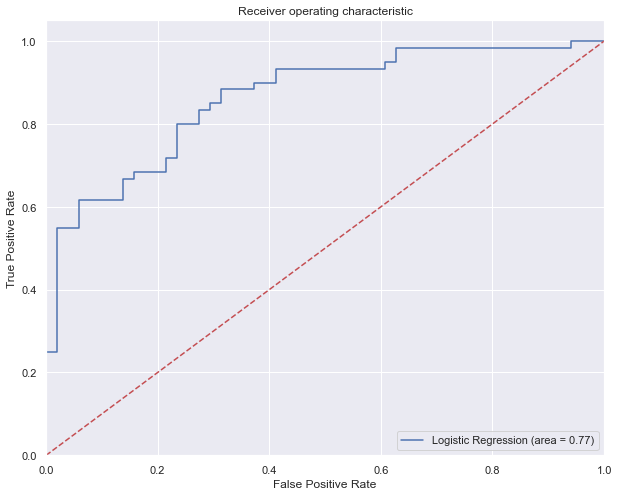

In [65]:
################# Plot ROC curve for the Logistic Regression Classification ###########################
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predicted_result)
fpr, tpr, thresholds = roc_curve(y_test, logreg2.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [66]:
print('Area Under the Curve Score for Logistic Regression Classifier is: %.2f !\n' % logit_roc_auc)

Area Under the Curve Score for Logistic Regression Classifier is: 0.77 !



# 5. Implement Random Forest Classifier
Random Forest takes the idea of a single decision tree, and creates an ensemble model out of hundreds or thousands of trees to reduce the variance. Each tree is trained on a random set of the observations, and for each split of a node, only a subset of the features are used for making a split. When making predictions, the random forest averages the predictions for each of the individual decision trees for each data point in order to arrive at a final classification.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()


print('The paramenters are: \n' + str(clf))
print('\n')

clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

print("The Accuracy of Random Forest is:",metrics.accuracy_score(y_test, y_pred))

# Create a classification report
print('\nThe classification report:\n')
print(classification_report(y_test, y_pred))

# Create a confusion matrix
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))

The paramenters are: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


The Accuracy of Random Forest is: 0.8198198198198198

The classification report:

             precision    recall  f1-score   support

          0       0.82      0.78      0.80        51
          1       0.82      0.85      0.84        60

avg / total       0.82      0.82      0.82       111


Confusion Matrix:

[[40 11]
 [ 9 51]]


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [71]:
## Grid Search in Random Forest

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9 , 10], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'min_samples_split': [ 2, 3,4],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train.values.ravel())

In [72]:
# Best parameters for Random Forest Classifier

print('The best parameter for random forest classifier are: \n')
print(grid_obj.best_params_)

The best parameter for random forest classifier are: 

{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 4}


<h> Use the random forest model with best parameters to train and test the model again<h>

In [73]:
# Use best model to precit the rating again
best_model = grid_obj.best_estimator_

# Train the model using the training sets
best_model.fit(X_train, y_train.values.ravel())

print('The paramenters are: \n' + str(best_model))
print('\n')

y_pred = best_model.predict(X_test)

print("The Accuracy of Best Random Forest Model is:",metrics.accuracy_score(y_test, y_pred))

# Create a classification report
print('\nThe classification report:\n')
print(classification_report(y_test, y_pred))

# Create a confusion matrix
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))

The paramenters are: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


The Accuracy of Best Random Forest Model is: 0.8288288288288288

The classification report:

             precision    recall  f1-score   support

          0       0.83      0.78      0.81        51
          1       0.83      0.87      0.85        60

avg / total       0.83      0.83      0.83       111


Confusion Matrix:

[[40 11]
 [ 8 52]]


Seem like stick to default Rnadom Forest parameter will perform higher accuracy

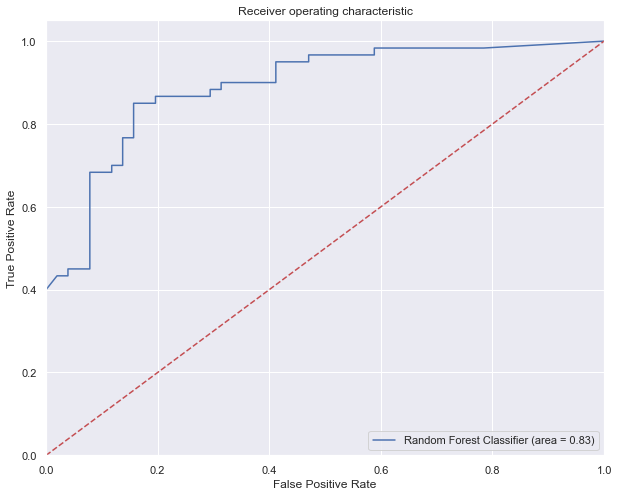

In [74]:
################# Plot ROC curve for the Logistic Regression Classification ###########################
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [75]:
print('Area Under the Curve Score for Random Forest Classifier is: %.2f !\n' % rf_roc_auc)

Area Under the Curve Score for Random Forest Classifier is: 0.83 !



# 8. Conclusions

- Overall both models not able to achieve high accuaray and f1-score.
- In terms of Recall, Precision, F1-Score and Accuracy ,random forest classifer did slightly better than logistic regressoin even thought logistic regression already being tuned to best parameters using grid search method.
- For AUC (Area under the curve ), the scoring of Random Forest Classifier also higher than logistic regression.
- Although both are good classifcation model when comes to this use case (most features are numerical variables), assumption of random forest performance better might due to its nature of better in handling outliers and logistic regression is vulnerable to overfitting.
- Grid Search Methods did not increase much performance by tuning the parameters , this might due to range of the parameters not enough or the amount of the data sets is not huge.
- K-Fold cross validation method did not being applied here is because the data sets is not really large hence folding each part of the data might not make significant changes in performance.
<br>


# 9 . Thoughts

<b>Reasons of Low Performance:</b>
-  Might due to misintepret of the loan status (method of categorizing the data to high risk and low risk) as the assumption are soley based on wordings and reference from investopedia.
- Low amount of funded loan data and imbalance amount of transactions for each loan status ( casue imbalance data sets for each category and might cause underfitting and high bias).
- Less data to be splitted to train and test data as need to cut out most of the 'low risk' data to prevent underfitting and high bias in model.

<br>

<b>Possible Approaches to improve performance:</b>
-  Have an understanding on the data sets , financial process on the data especially loan status from business stakeholder who gave out the data sets.
-  Increase more real funded data sets and get more transaction data for relevant loan staus.
-  Explore and try out other unused fetaures from payment data ( principle, interest etc.) and clarity underwritting varaibles data as these features might significantly affect the target variables.
-  Try out other feature engineering methods such as backward/forward elimination.
-  Use esembled machine learning methods or try out other machine learning models and comapre the overall peroformance with existing one.